Homework 7
Cluster the reviews that you collected in homework 5, by doing the following:
1. In Python, select any one of the clustering methods covered in this course. Run it over the
collection of reviews, and show at least two different ways of clustering the reviews, e.g.,
changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.



In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download("punkt")
from nltk import word_tokenize
nltk.download('universal_tagset')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [4]:
url=["https://www.rottentomatoes.com/m/arrival_2016/reviews",
     "https://www.rottentomatoes.com/m/guardians_of_the_galaxy/reviews",
     "https://www.rottentomatoes.com/m/guardians_of_the_galaxy_vol_2/reviews",
     "https://www.rottentomatoes.com/m/star_wars_episode_vii_the_force_awakens/reviews",
     "https://www.rottentomatoes.com/m/interstellar_2014/reviews"]

title=["Arrival",
     "guardians_of_the_galaxy",
     "guardians_of_the_galaxy_vol_2",
     "star_wars_episode_vii_the_force_awakens",
     "interstellar_2014"]


In [5]:
i=0

review_text_raw = []
url_raw = []
author_raw = []
title_raw = []

while i < 5:
  response = requests.get(url[i])
  content = response.text
  z=0
  # Create a BeautifulSoup object
  soup = BeautifulSoup(content, "html.parser")

  # Find all the review containers
  review_containers = soup.find_all("div", class_="review-row")

  # Iterate over each review container
  for container in review_containers:
      # Extract review text
      review_text = container.find("p", class_="review-text").text.strip()
      review_text_raw.append(review_text)
      print(review_text)

      # Extract review url
      review_url = container.find("a", {'class': 'full-url'}, href=True)
      url_raw.append(review_url)

      #Extract reviewer name
      reviewer = container.find("a", class_="display-name").text.strip()
      author_raw.append(reviewer)

      title_raw.append(title[i])

      # Extract review URL
    # review_url = container.find("a", class_="full-url")["href"].strip()
    # print(review_text)
      print(z)
      z+=1
  i+=1

Leaves us with hope... One of the best sci-fi films of recent times without gunfights. [Full review in Spanish]
0
Melancholy, mysterious and measured as it tracks the struggle to communicate with these alien creatures, Arrival is really about language and how it functions, how it shapes us and sometimes limits us, and how it can connect or separate us.
1
Amy Adams’ transcendent portrayal of a linguist...
2
I appreciated the intelligent science fiction, but also how the film steps beyond genre. It turned out to be far more intimate and thought-provoking than I ever expected. And all of that on top of the superb visuals, art direction, and score.
3
The trippy events unfolding out of Heisserer’s screenplay tangle the puppeteer’s strings and play with narrative and filmmaking forces few are daring enough, and smart enough, to wield.
4
Both cerebral and achingly emotional, Arrival sustains a message about hope and understanding for a better humanity that audiences may need right now.
5
One 

In [6]:
df = pd.DataFrame({'Title': list(title_raw), 'Author': list(author_raw), 'Review':list(review_text_raw), 'Url':list(url_raw)}, columns=['Title','Author', 'Review', 'Url'])
df['Review'] = df['Review'].map(lambda x: x.lstrip('+-').rstrip('[Full review in Spanish]'))
#df['Url'] = df['Url'].map(lambda x: x.lstrip('+-').rstrip('<a class='))
#df['Url'] = df['Url'].map(lambda x: x.lstrip('+-').rstrip('" rel="nofollow noopener" target="_blank">Full Review</a>'))

df

,Title,Author,Review,Url
0,Arrival,Erick Estrada,Leaves us with hope... One of the best sci-fi ...,[Full Review]
1,Arrival,Alison Gillmor,"Melancholy, mysterious and measured as it trac...",[Full Review]
2,Arrival,Brian T. Carney,Amy Adams’ transcendent portrayal of a linguis...,[Full Review]
3,Arrival,Keith Garlington,"I appreciated the intelligent science fiction,...",[Full Review]
4,Arrival,Don Shanahan,The trippy events unfolding out of Heisserer’s...,[Full Review]
...,...,...,...,...
95,interstellar_2014,Siddhant Adlakha,A big-budget reprise of ideas Nolan has been e...,[Full Review]
96,interstellar_2014,Stephen A. Russell,None of these characters feel fully-fledged......,[Full Review]
97,interstellar_2014,Kelechi Ehenulo,Interstellar is not Christopher Nolan's best f...,[Full Review]
98,interstellar_2014,Brent McKnight,As spectacular as it is flawed.,[Full Review]


3. Explain which of the two clustering results from question 1 is preferable (if one of them is),
and why.
Submit all of your inputs and outputs and your code for this assignment, along with a brief written
explanation of your findings.

In [ ]:
df['Review'][i]

'One of the most beautiful, emotional and original science-fiction films of the last decade.'

In [10]:
nlp = spacy.load('en_core_web_sm')
title_for_np = []
i=0

np_chunk = []
while i < len(df):
  df['Review'] = df.Review.apply(lambda text:
                                          " ".join(token.lemma_ for token in nlp(text)
                                                   if not token.is_stop))
  doc = nlp(df['Review'][i])
  for noun_chunk in doc.noun_chunks:
    np_chunk.append(noun_chunk)
    title_for_np.append(df['Title'][i])
    print( df['Title'][i], noun_chunk)

  i+=1

Arrival hope
Arrival good sci - fi film recent time gunfight
Arrival melancholy , mysterious measure track struggle
Arrival alien creature
Arrival Arrival language function
Arrival shape limit
Arrival Amy Adams ’ transcendent portrayal linguist
Arrival intelligent science fiction
Arrival far intimate thought - provoke
Arrival art direction
Arrival trippy event
Arrival Heisserer screenplay tangle puppeteer string
Arrival narrative filmmake force
Arrival Arrival
Arrival message hope
Arrival humanity audience
Arrival beautiful , emotional original science - fiction film decade
Arrival good film
Arrival motion picture
Arrival far focused humanity
Arrival transcendent view experience skin heart
Arrival arrival
Arrival sci - fi story
Arrival hypnotic strange beautiful - beautiful time
Arrival word
Arrival astonishingly beautiful film
Arrival fine , fine , science fiction movie
Arrival 21st Century
Arrival true theme
Arrival Arrival
Arrival premonition tangible event
Arrival slow - burn thril

In [13]:
np_df = pd.DataFrame({'Title': list(title_for_np), 'NP': list(np_chunk)}, columns=['Title', 'NP'])
np_df

,Title,NP
0,Arrival,(hope)
1,Arrival,"(good, sci, -, fi, film, recent, time, gunfight)"
2,Arrival,"(melancholy, ,, mysterious, measure, track, st..."
3,Arrival,"(alien, creature)"
4,Arrival,"(Arrival, language, function)"
...,...,...
256,interstellar_2014,"(fully, -, fledge)"
257,interstellar_2014,"(film, rife, schmaltzy, musing, mean, life, ,,..."
258,interstellar_2014,"(Christopher, Nolan, good, film, deny, ambition)"
259,interstellar_2014,"(interstellar, grand, space, adventure, worthy..."


In [19]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(df['Review'])

print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 0.038 s


In [26]:
labels = df.Title
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

In [27]:
from sklearn.cluster import KMeans
import numpy as np

for seed in range(5):
    kmeans = KMeans(
        n_clusters=5,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements assigned to each cluster: [76  4  5  8  7]
Number of elements assigned to each cluster: [75  8  7  5  5]
Number of elements assigned to each cluster: [ 7 74  4  7  8]
Number of elements assigned to each cluster: [10 10  5  9 66]
Number of elements assigned to each cluster: [59 10  8 14  9]

True number of documents in each category according to the class labels: [20 20 20 20 20]


In [29]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np


# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters=5).fit(X_tfidf.toarray())

# print the class labels
print(clustering.labels_)

[0 1 1 2 1 1 2 0 1 1 1 2 1 1 1 0 1 0 2 1 3 4 0 0 0 1 1 1 0 0 1 0 0 3 0 0 2
 1 0 1 0 0 1 0 1 0 1 1 3 0 1 0 1 1 1 0 0 3 3 3 0 3 1 4 1 4 1 4 1 1 4 1 4 4
 1 4 4 0 1 1 1 2 1 1 0 1 1 1 1 0 0 1 1 2 1 0 0 0 1 1]


In [32]:
df['Diana'] = clustering.labels_

In [33]:
df['kmeans'] = kmeans.labels_

In [34]:
df

,Title,Author,Review,Url,Diana,kmeans
0,Arrival,Erick Estrada,leave hope ... good sci - fi film recent time ...,[Full Review],0,3
1,Arrival,Alison Gillmor,"melancholy , mysterious measure track struggle...",[Full Review],1,0
2,Arrival,Brian T. Carney,Amy Adams ’ transcendent portrayal linguist ...,[Full Review],1,0
3,Arrival,Keith Garlington,"appreciate intelligent science fiction , film ...",[Full Review],2,2
4,Arrival,Don Shanahan,trippy event unfold Heisserer screenplay tangl...,[Full Review],1,4
...,...,...,...,...,...,...
95,interstellar_2014,Siddhant Adlakha,big - budget reprise idea Nolan explore beginn...,[Full Review],0,3
96,interstellar_2014,Stephen A. Russell,character feel fully - fledge ... film rife sc...,[Full Review],0,0
97,interstellar_2014,Kelechi Ehenulo,interstellar Christopher Nolan good film deny ...,[Full Review],0,3
98,interstellar_2014,Brent McKnight,spectacular flawed .,[Full Review],1,0


In [38]:
df.groupby(['Title']).mean()

<ipython-input-38-1698629b34d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Title']).mean()


,Diana,kmeans
Title,,
Arrival,1.0,1.50
guardians_of_the_galaxy,0.9,0.30
guardians_of_the_galaxy_vol_2,1.0,0.20
interstellar_2014,0.8,1.45
star_wars_episode_vii_the_force_awakens,2.2,1.75


2. Try to write a short phrase to characterize (give a natural interpretation of) what each
cluster is generally centered on semantically. Is this hard to do in some cases? If so, make
note of that fact.


In [ ]:
num_df.loc[num_df['a'] == 2]

In [56]:
df.loc[df['Title'] == 'Arrival']

,Title,Author,Review,Url,Diana,kmeans
0,Arrival,Erick Estrada,leave hope ... good sci - fi film recent time ...,[Full Review],0,3
1,Arrival,Alison Gillmor,"melancholy , mysterious measure track struggle...",[Full Review],1,0
2,Arrival,Brian T. Carney,Amy Adams ’ transcendent portrayal linguist ...,[Full Review],1,0
3,Arrival,Keith Garlington,"appreciate intelligent science fiction , film ...",[Full Review],2,2
4,Arrival,Don Shanahan,trippy event unfold Heisserer screenplay tangl...,[Full Review],1,4
5,Arrival,Brian Eggert,"cerebral achingly emotional , Arrival sustain ...",[Full Review],1,0
6,Arrival,Alex Behan,"beautiful , emotional original science - ficti...",[Full Review],2,2
7,Arrival,Matt Brunson,good film 2016 . motion picture turn far focus...,[Full Review],0,3
8,Arrival,Nathan Mattise,arrival overall good movie decade way cleverly...,[Full Review],1,0
9,Arrival,Jason Adams,hypnotic strange beautiful - beautiful time ? ...,[Full Review],1,0


In [57]:
Arrival = df.loc[df['Title'] == 'Arrival']
guardians_of_the_galaxy = df.loc[df['Title'] == 'guardians_of_the_galaxy']
guardians_of_the_galaxy_vol_2 = df.loc[df['Title'] == 'guardians_of_the_galaxy_vol_2']
interstellar_2014 = df.loc[df['Title'] == 'interstellar_2014']
star_wars_episode_vii_the_force_awakens = df.loc[df['Title'] == 'star_wars_episode_vii_the_force_awakens']

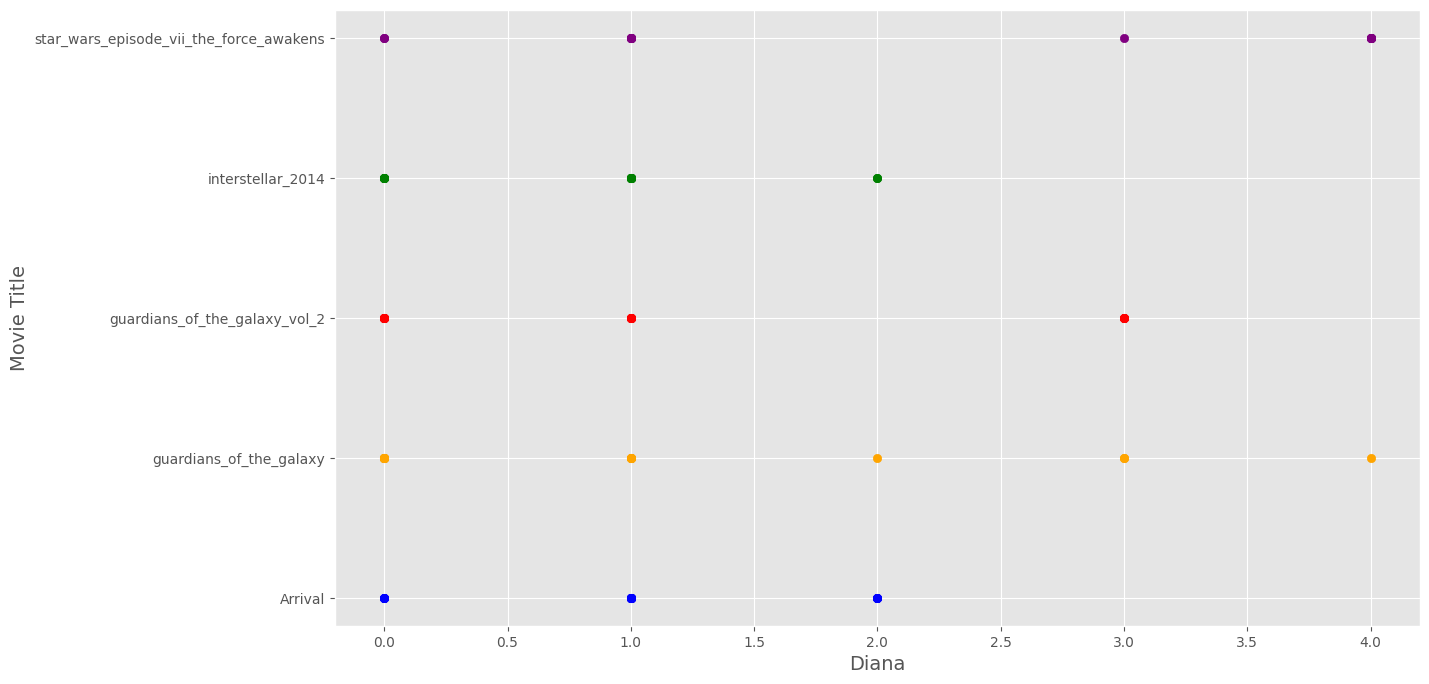

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.scatter(Arrival['Diana'], Arrival['Title'], color='blue')
plt.scatter(guardians_of_the_galaxy['Diana'], guardians_of_the_galaxy['Title'], color='orange')
plt.scatter(guardians_of_the_galaxy_vol_2['Diana'], guardians_of_the_galaxy_vol_2['Title'], color='red')
plt.scatter(interstellar_2014['Diana'], interstellar_2014['Title'], color='green')
plt.scatter(star_wars_episode_vii_the_force_awakens['Diana'], star_wars_episode_vii_the_force_awakens['Title'], color='purple')
plt.xlabel("Diana", size=14)
plt.ylabel("Movie Title", size=14)
plt.show()

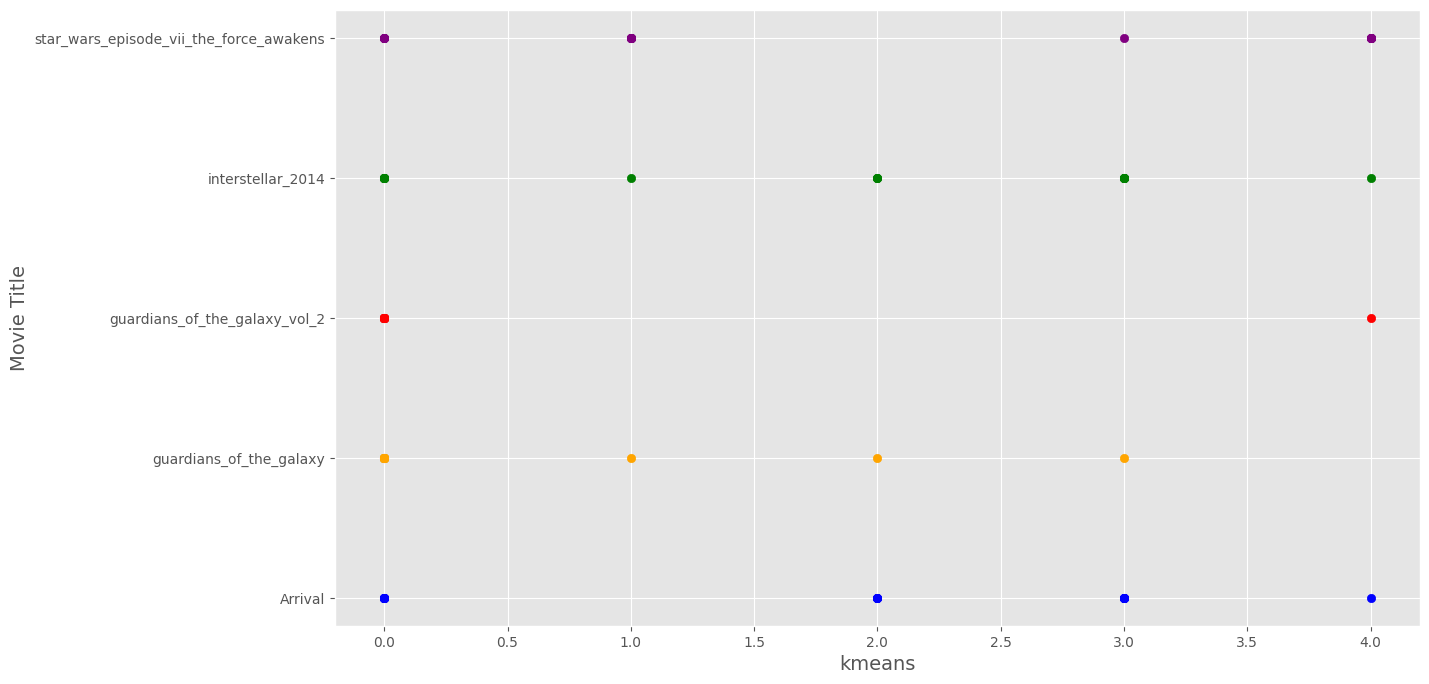

In [72]:
plt.figure(figsize=(14, 8))
plt.scatter(Arrival['kmeans'], Arrival['Title'], color='blue')
plt.scatter(guardians_of_the_galaxy['kmeans'], guardians_of_the_galaxy['Title'], color='orange')
plt.scatter(guardians_of_the_galaxy_vol_2['kmeans'], guardians_of_the_galaxy_vol_2['Title'], color='red')
plt.scatter(interstellar_2014['kmeans'], interstellar_2014['Title'], color='green')
plt.scatter(star_wars_episode_vii_the_force_awakens['kmeans'], star_wars_episode_vii_the_force_awakens['Title'], color='purple')
plt.xlabel("kmeans", size=14)
plt.ylabel("Movie Title", size=14)
plt.show()

Text(0, 0.5, 'kmeans')

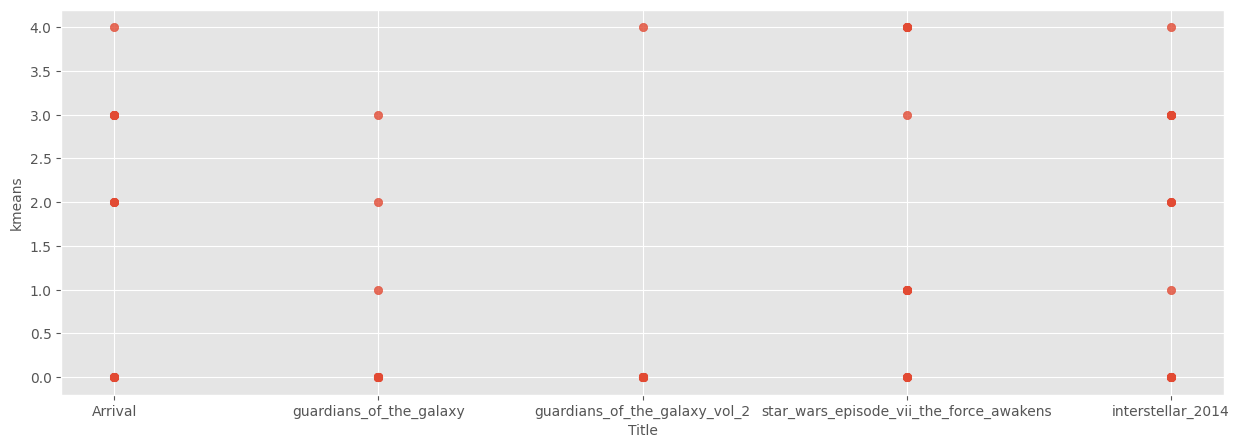

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.style.use('ggplot')
plt.scatter('Title', 'kmeans', alpha=0.8, data=df)
plt.xlabel("Title", size=10)
plt.ylabel("kmeans", size=10)


3. Explain which of the two clustering results from question 1 is preferable (if one of them is),
and why

Diana picked up the similarity between guardians of the galaxy and guardians of the galaxy volume 2 better vs. kmeans. Diana worked hierarchically clustering, while kmeans works off of centroid.